<h1 style="text-align:center;"> Prediction of the flight cancelation</h1

# Importations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import time

import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score
from sklearn import cluster
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import seaborn as sn

# Data preprocessing

In [18]:
data = pd.read_csv('balance_cancelled.csv')
data.drop(columns = data.columns[0], inplace=True)
#data = data.fillna(-1)
#data = data.dropna()
values = {"DepTime": -1, "DepDelay": -1, "ArrTime": -1, "ArrDelay": -1, "AirTime": -1, "ActualElapsedTime": -1, "DepDel15": -1, "DepartureDelayGroups": -1, "ArrDel15": -1, "ArrivalDelayGroups": -1, "Tail_Number": 'unknown', "DepDelayClass": -1}
data = data.fillna(value=values)
data = data.fillna(-1)
data

,index,Date,Airline,Origin,Destination,Cancelled,CRSDepTime,DepTime,DepDelay,ArrTime,...,DestStateName,DepDel15,DepartureDelayGroups,DepTimeBlk,CRSArrTime,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DepDelayClass
0,7012333,2019-11-27,SkyWest Airlines Inc.,DLH,MSP,True,700,-1.0,-1.0,-1.0,...,Minnesota,-1.0,-1.0,0700-0759,811,-1.0,-1.0,0800-0859,1,-1.0
1,6351093,2019-03-06,SkyWest Airlines Inc.,DFW,MHK,False,2041,2116.0,35.0,2240.0,...,Kansas,1.0,2.0,2000-2059,2219,1.0,1.0,2200-2259,2,5.0
2,3750769,2020-02-06,Comair Inc.,CLT,FWA,True,1129,1829.0,420.0,-1.0,...,Indiana,1.0,12.0,1100-1159,1313,-1.0,-1.0,1300-1359,2,5.0
3,4420413,2021-05-09,Endeavor Air Inc.,LGA,PWM,False,2025,2020.0,0.0,2123.0,...,Maine,0.0,-1.0,2000-2059,2152,0.0,-2.0,2100-2159,2,0.0
4,3173600,2021-08-13,Spirit Air Lines,DTW,MCO,False,1034,1032.0,0.0,1307.0,...,Florida,0.0,-1.0,1000-1059,1317,0.0,-1.0,1300-1359,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7534606,2019-01-05,Alaska Airlines Inc.,LAS,LAX,False,1835,1827.0,0.0,1945.0,...,California,0.0,-1.0,1800-1859,1952,0.0,-1.0,1900-1959,1,0.0
99996,7471266,2019-01-28,SkyWest Airlines Inc.,CRW,ATL,False,1100,1057.0,0.0,1225.0,...,Georgia,0.0,-1.0,1100-1159,1236,0.0,-1.0,1200-1259,2,0.0
99997,6871383,2019-11-14,Southwest Airlines Co.,BUR,SJC,True,800,-1.0,-1.0,-1.0,...,California,-1.0,-1.0,0800-0859,915,-1.0,-1.0,0900-0959,2,-1.0
99998,7022007,2019-11-11,SkyWest Airlines Inc.,DTW,ELM,False,2051,2108.0,17.0,2255.0,...,New York,1.0,1.0,2000-2059,2211,1.0,2.0,2200-2259,2,4.0


In [19]:
def convertTime(str_time):
    timestamp = datetime.datetime.strptime(str_time,"%Y-%m-%d")
    tuple = timestamp.timetuple()
    timestamp = time.mktime(tuple)

    return(timestamp)

data['Date'] = data['Date'].apply(convertTime)
data

,index,Date,Airline,Origin,Destination,Cancelled,CRSDepTime,DepTime,DepDelay,ArrTime,...,DestStateName,DepDel15,DepartureDelayGroups,DepTimeBlk,CRSArrTime,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DepDelayClass
0,7012333,1.574809e+09,SkyWest Airlines Inc.,DLH,MSP,True,700,-1.0,-1.0,-1.0,...,Minnesota,-1.0,-1.0,0700-0759,811,-1.0,-1.0,0800-0859,1,-1.0
1,6351093,1.551827e+09,SkyWest Airlines Inc.,DFW,MHK,False,2041,2116.0,35.0,2240.0,...,Kansas,1.0,2.0,2000-2059,2219,1.0,1.0,2200-2259,2,5.0
2,3750769,1.580944e+09,Comair Inc.,CLT,FWA,True,1129,1829.0,420.0,-1.0,...,Indiana,1.0,12.0,1100-1159,1313,-1.0,-1.0,1300-1359,2,5.0
3,4420413,1.620511e+09,Endeavor Air Inc.,LGA,PWM,False,2025,2020.0,0.0,2123.0,...,Maine,0.0,-1.0,2000-2059,2152,0.0,-2.0,2100-2159,2,0.0
4,3173600,1.628806e+09,Spirit Air Lines,DTW,MCO,False,1034,1032.0,0.0,1307.0,...,Florida,0.0,-1.0,1000-1059,1317,0.0,-1.0,1300-1359,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7534606,1.546643e+09,Alaska Airlines Inc.,LAS,LAX,False,1835,1827.0,0.0,1945.0,...,California,0.0,-1.0,1800-1859,1952,0.0,-1.0,1900-1959,1,0.0
99996,7471266,1.548630e+09,SkyWest Airlines Inc.,CRW,ATL,False,1100,1057.0,0.0,1225.0,...,Georgia,0.0,-1.0,1100-1159,1236,0.0,-1.0,1200-1259,2,0.0
99997,6871383,1.573686e+09,Southwest Airlines Co.,BUR,SJC,True,800,-1.0,-1.0,-1.0,...,California,-1.0,-1.0,0800-0859,915,-1.0,-1.0,0900-0959,2,-1.0
99998,7022007,1.573427e+09,SkyWest Airlines Inc.,DTW,ELM,False,2051,2108.0,17.0,2255.0,...,New York,1.0,1.0,2000-2059,2211,1.0,2.0,2200-2259,2,4.0


In [20]:

data_original = data.copy()

data["Airline"] = LabelEncoder().fit_transform(data["Airline"])
data["Origin"] = LabelEncoder().fit_transform(data["Origin"])
data["Destination"] = LabelEncoder().fit_transform(data["Destination"])
data["Operating_Airline"] = LabelEncoder().fit_transform(data["Operating_Airline"])
data["Tail_Number"] = LabelEncoder().fit_transform(data["Tail_Number"])
data["OriginAirportID"] = LabelEncoder().fit_transform(data["OriginAirportID"])
data["OriginCityName"] = LabelEncoder().fit_transform(data["OriginCityName"])
data["OriginStateName"] = LabelEncoder().fit_transform(data["OriginStateName"])
data["DestCityName"] = LabelEncoder().fit_transform(data["DestCityName"])
data["DestStateName"] = LabelEncoder().fit_transform(data["DestStateName"])
data["DepTimeBlk"] = LabelEncoder().fit_transform(data["DepTimeBlk"])
data["ArrTimeBlk"] = LabelEncoder().fit_transform(data["ArrTimeBlk"])

data

,index,Date,Airline,Origin,Destination,Cancelled,CRSDepTime,DepTime,DepDelay,ArrTime,...,DestStateName,DepDel15,DepartureDelayGroups,DepTimeBlk,CRSArrTime,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DepDelayClass
0,7012333,1.574809e+09,5,93,223,True,700,-1.0,-1.0,-1.0,...,21,-1.0,-1.0,2,811,-1.0,-1.0,3,1,-1.0
1,6351093,1.551827e+09,5,89,208,False,2041,2116.0,35.0,2240.0,...,14,1.0,2.0,15,2219,1.0,1.0,17,2,5.0
2,3750769,1.580944e+09,1,68,123,True,1129,1829.0,420.0,-1.0,...,12,1.0,12.0,6,1313,-1.0,-1.0,8,2,5.0
3,4420413,1.620511e+09,3,187,263,False,2025,2020.0,0.0,2123.0,...,17,0.0,-1.0,15,2152,0.0,-2.0,16,2,0.0
4,3173600,1.628806e+09,7,96,199,False,1034,1032.0,0.0,1307.0,...,7,0.0,-1.0,5,1317,0.0,-1.0,8,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7534606,1.546643e+09,0,177,178,False,1835,1827.0,0.0,1945.0,...,4,0.0,-1.0,13,1952,0.0,-1.0,14,1,0.0
99996,7471266,1.548630e+09,5,77,21,False,1100,1057.0,0.0,1225.0,...,8,0.0,-1.0,6,1236,0.0,-1.0,7,2,0.0
99997,6871383,1.573686e+09,6,52,297,True,800,-1.0,-1.0,-1.0,...,4,-1.0,-1.0,3,915,-1.0,-1.0,4,2,-1.0
99998,7022007,1.573427e+09,5,96,103,False,2051,2108.0,17.0,2255.0,...,30,1.0,1.0,15,2211,1.0,2.0,17,2,4.0


<AxesSubplot:ylabel='Frequency'>

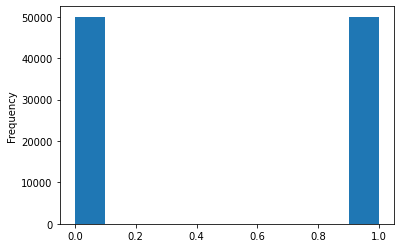

In [21]:
def convertBoolean(test):
    if test == True :
        return 0
    else :
        return 1

data['Cancelled'].apply(convertBoolean).plot.hist()

## Feature selection for the classification

In [25]:
print("The correlation between the 'Cancelled'and 'Deptime' Features : " + str(data["Cancelled"].corr(data["DepTime"])))
print("The correlation between the 'Cancelled'and 'DepDelay' Features : " + str(data["Cancelled"].corr(data["DepDelay"])))
print("The correlation between the 'Cancelled'and 'ArrTime' Features : " + str(data["Cancelled"].corr(data["ArrTime"])))
print("The correlation between the 'Cancelled'and 'ArrDelay' Features : " + str(data["Cancelled"].corr(data["ArrDelay"])))
print("The correlation between the 'Cancelled'and 'AirTime' Features : " + str(data["Cancelled"].corr(data["AirTime"])))
print("The correlation between the 'Cancelled'and 'ActualElapsedTime' Features : " + str(data["Cancelled"].corr(data["ActualElapsedTime"])))
print("The correlation between the 'Cancelled'and 'DepDel15' Features : " + str(data["Cancelled"].corr(data["DepDel15"])))
print("The correlation between the 'Cancelled'and 'DepartureDelayGroups' Features : " + str(data["Cancelled"].corr(data["DepartureDelayGroups"])))
print("The correlation between the 'Cancelled'and 'ArrDel15' Features : " + str(data["Cancelled"].corr(data["ArrDel15"])))
print("The correlation between the 'Cancelled'and 'ArrivalDelayGroups' Features : " + str(data["Cancelled"].corr(data["ArrivalDelayGroups"])))
print("The correlation between the 'Cancelled'and 'DepDelayClass' Features : " + str(data["Cancelled"].corr(data["DepDelayClass"])))

The correlation between the 'Cancelled'and 'Deptime' Features : -0.8686208537927026
The correlation between the 'Cancelled'and 'DepDelay' Features : -0.18014024633964
The correlation between the 'Cancelled'and 'ArrTime' Features : -0.8908373369418139
The correlation between the 'Cancelled'and 'ArrDelay' Features : -0.19934997432889492
The correlation between the 'Cancelled'and 'AirTime' Features : -0.7413526848455014
The correlation between the 'Cancelled'and 'ActualElapsedTime' Features : -0.7958031679028902
The correlation between the 'Cancelled'and 'DepDel15' Features : -0.8887313593171559
The correlation between the 'Cancelled'and 'DepartureDelayGroups' Features : -0.28309918907758924
The correlation between the 'Cancelled'and 'ArrDel15' Features : -0.9108141458676732
The correlation between the 'Cancelled'and 'ArrivalDelayGroups' Features : -0.20158293236894864
The correlation between the 'Cancelled'and 'DepDelayClass' Features : -0.6073419046898956


## Generating x and y

In [29]:
data = data.drop(['DepTime', 'DepDelay' , 'ArrTime', 'ArrDelay', 'AirTime', 'ActualElapsedTime', 'DepDel15', 'DepartureDelayGroups', 'ArrDel15', 'ArrivalDelayGroups', 'DepDelayClass'], axis=1)

y = data['Cancelled']  #target variable
X = data.drop('Cancelled',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)  #test-size 20%
#X_train = X_train.fillna('unknown')
#X_train.to_csv('x_train.csv')


# Classification

## I. Random Forest Classification

### I.1. Basic training

In [12]:
#Initializing the model
forest = RandomForestClassifier(max_depth=10)

#Fitting the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [14]:
y_test_predict = forest.predict(X_test)
y_train_predict = forest.predict(X_train)

In [15]:
acc_train = accuracy_score(y_train,y_train_predict)
acc_test = accuracy_score(y_test,y_test_predict)
f1score_train = f1_score(y_train, y_train_predict, average='binary')

print("Accuracy score on training data : " + str(acc_train))
print("Accuracy score on test data : " + str(acc_test))
print("\nF1 Score on training data : " + str(f1score_train))

Accuracy score on training data : 0.8266
Accuracy score on test data : 0.8066

F1 Score on training data : 0.8102014010507882


### I.2. Feature importance

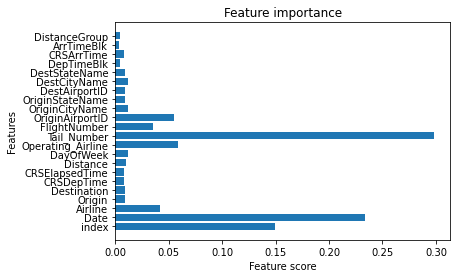

In [9]:
plt.figure()
n = len(X_train.columns)
plt.barh(range(n), forest.feature_importances_, align='center')
plt.yticks(np.arange(n), X_train.columns)
plt.xlabel("Feature score")
plt.ylabel("Features")
plt.title("Feature importance")
plt.show()

### I.3 Parameters tuning

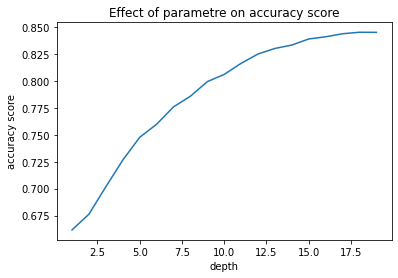

In [10]:
X=[i for i in range(1,20)]
Y=[]
for i in range(1,20):
  forest = RandomForestClassifier(max_depth = i)
  forest.fit(X_train, y_train)
    
  y_test_forest = forest.predict(X_test)
  y_train_forest = forest.predict(X_train)
    
  acc_test_forest = accuracy_score(y_test,y_test_forest)
  Y = Y + [acc_test_forest]

plt.title("Effect of parametre on accuracy score")
plt.xlabel("depth")
plt.ylabel("accuracy score")
plt.plot(X,Y)

## II. Decision Tree Classifier

### II.1. Basic training

In [17]:
# initializing the model
dt = DecisionTreeClassifier(max_depth = 10)

# training the model on the training set
dt.fit(X_train, y_train)

# predictions of the testing set
y_test_predict = dt.predict(X_test)
y_train_predict = dt.predict(X_train)

In [18]:
acc_train = accuracy_score(y_train,y_train_predict)
acc_test = accuracy_score(y_test,y_test_predict)
f1score_train = f1_score(y_train, y_train_predict, average='binary')

print("Accuracy score on training data : " + str(acc_train))
print("Accuracy score on test data : " + str(acc_test))
print("\nF1 Score on training data : " + str(f1score_train))

Accuracy score on training data : 0.818375
Accuracy score on test data : 0.8044

F1 Score on training data : 0.8148431327573463


### II.2. Feature importance

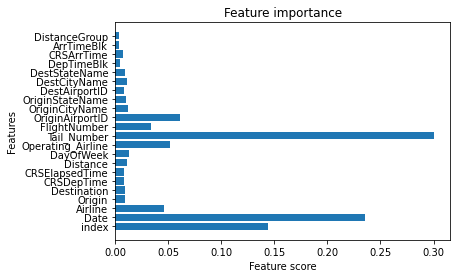

In [19]:
plt.figure()
n = len(X_train.columns)
plt.barh(range(n), forest.feature_importances_, align='center')
plt.yticks(np.arange(n), X_train.columns)
plt.xlabel("Feature score")
plt.ylabel("Features")
plt.title("Feature importance")
plt.show()

### II.3. Parameter tuning

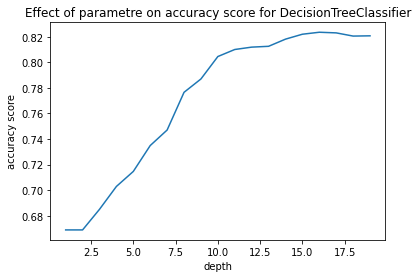

In [20]:
X=[i for i in range(1,20)]
Y=[]
for i in range(1,20):
  tree = DecisionTreeClassifier(max_depth = i)
  tree.fit(X_train, y_train)
    
  y_test_tree = tree.predict(X_test)
  y_train_tree = tree.predict(X_train)
    
  acc_test = accuracy_score(y_test,y_test_tree)
  Y = Y + [acc_test]

plt.title("Effect of parametre on accuracy score for DecisionTreeClassifier")
plt.xlabel("depth")
plt.ylabel("accuracy score")
plt.plot(X,Y)

### II.4. Comparison with Random Forest

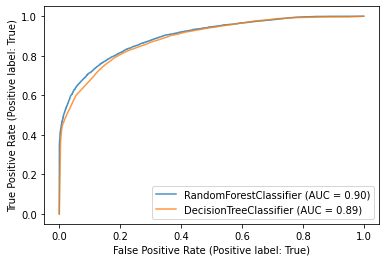

In [16]:
#Decision Tree model
tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(X_train, y_train)
# Random Forest model
forest = RandomForestClassifier(max_depth=10)
forest.fit(X_train, y_train)
#Comparing the true positive and the false positive rates
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(forest, X_test, y_test, ax=ax, alpha=0.8)
tree_disp = RocCurveDisplay.from_estimator(tree, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

## III. KNN

### III.1. Basic training

In [23]:
#Initializing the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Training the model
knn.fit(X_train, y_train)

#Predicting the test data
y_pred = knn.predict(X_test)


In [24]:
print("f1 score : " + str(f1_score(y_test, y_pred)))
print("accuracy score : " + str(accuracy_score(y_test, y_pred)))

f1 score : 0.8297935688765383
accuracy score : 0.8285


### III.2. Parameters Tuning

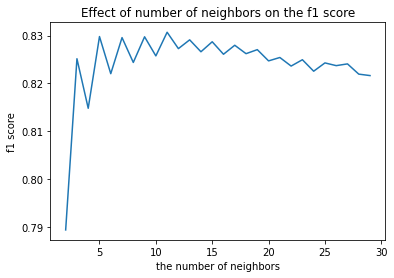

In [25]:
Y=[]
for i in range(2,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = f1_score(y_test,y_pred)
    Y = Y + [score]
plt.title("Effect of number of neighbors on the f1 score")
plt.xlabel("the number of neighbors")
plt.ylabel("f1 score")
plt.plot(range(2,30),Y)

## IV. Naive bayes

### Gaussian Naive Bayes

In [26]:
#Initializing the model
nb = GaussianNB()

#Train the model
nb.fit(X_train, y_train)

#Predictions for the testing set
y_pred = nb.predict(X_test)

In [27]:
print("f1 score : " + str(f1_score(y_test, y_pred)))
print("accuracy score : " + str(accuracy_score(y_test, y_pred)))

f1 score : 0.6148202494497431
accuracy score : 0.6325


### Multinomial  Naive Bayes

In [28]:
#Initializing the model
nb = MultinomialNB()

#Train the model
nb.fit(X_train, y_train)

#Predictions for the testing set
y_pred = nb.predict(X_test)

In [29]:
print("f1 score : " + str(f1_score(y_test, y_pred)))
print("accuracy score : " + str(accuracy_score(y_test, y_pred)))

f1 score : 0.44609825810278814
accuracy score : 0.48645


### Bernoulli Naive Bayes

In [30]:
#Initializing the model
nb = BernoulliNB()

#Train the model
nb.fit(X_train, y_train)

#Predictions for the testing set
y_pred = nb.predict(X_test)

In [31]:
print("f1 score : " + str(f1_score(y_test, y_pred)))
print("accuracy score : " + str(accuracy_score(y_test, y_pred)))

f1 score : 0.6476562217644295
accuracy score : 0.51255


## V. SVC

### V.1. rbf SVC

In [ ]:
#Initializing the model
#model = SVC()

#Training the model
#model.fit(X_train, y_train)

#Prediction on the testing set
#y_pred = model.predict(X_test)

In [ ]:
print("f1 score : " + str(f1_score(y_test, y_pred)))
print("accuracy score : " + str(accuracy_score(y_test, y_pred)))

### V.2. linear SVC

In [ ]:
#Initializing the model
#model = SVC(kernel = 'linear')

#Training the model
#model.fit(X_train, y_train)

#Prediction on the testing set
#y_pred = model.predict(X_test)

In [ ]:
print("f1 score : " + str(f1_score(y_test, y_pred)))
print("accuracy score : " + str(accuracy_score(y_test, y_pred)))